##                    **Titanic**

Plenty of steps to take in any data competition, first the overview :-



#### **I - Overview** :-

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### **II - Data Analysis**
As in different data projects, we'll first start diving into the data and build up our first intuitions.

In this section, we'll be doing four things.

Data extraction : we'll load the dataset and have a first look at it.
Cleaning : we'll fill in missing values.
Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
Assumptions : we'll formulate hypotheses from the charts.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

Two datasets are always available: a training and a test set. 

In [3]:
data = pd.read_csv('./../data/titanic-data/train.csv')

In [4]:
print(data.shape)

(891, 12)


In [12]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Need to know no.of training examples and number of features available

In [22]:
m_training = data.shape[0]
n_features = data.shape[1]
print("Number of training examples : {0}\nNumber of features : {1}".format(m_training , n_features))

Number of training examples : 891
Number of features : 12


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This clearly shows us that there are 177 values in the age feature which just don't match. Either the data was poorly recieved by the folks at the titanic or they just weren't recorded at all. (They did have a lot of trouble with illegitimate boarders like our protagonist Jack.) How do we fix this?

In [30]:
data['Age'] = data['Age'].fillna(data['Age'].median())
#Improve data filling with more accurate hypothesis,
#not necessary that median age is the right assumption for everyone

#### ** III - Data Visualization**

In [31]:
data['Died'] = 1 - data['Survived']

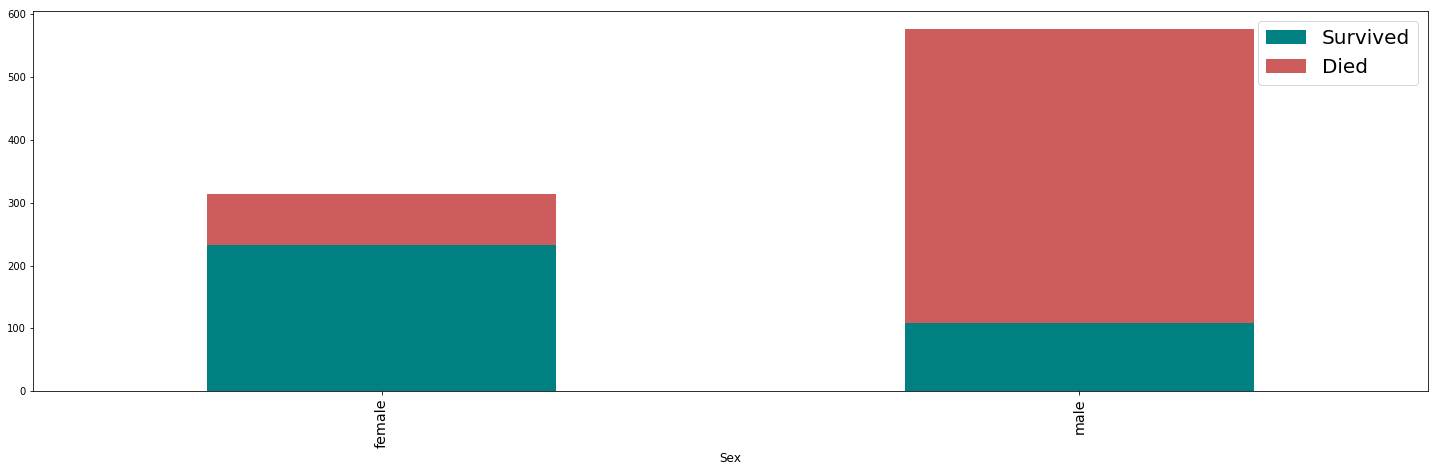

In [46]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind = "bar", figsize=(25,7), stacked=True, color=['teal','IndianRed'])

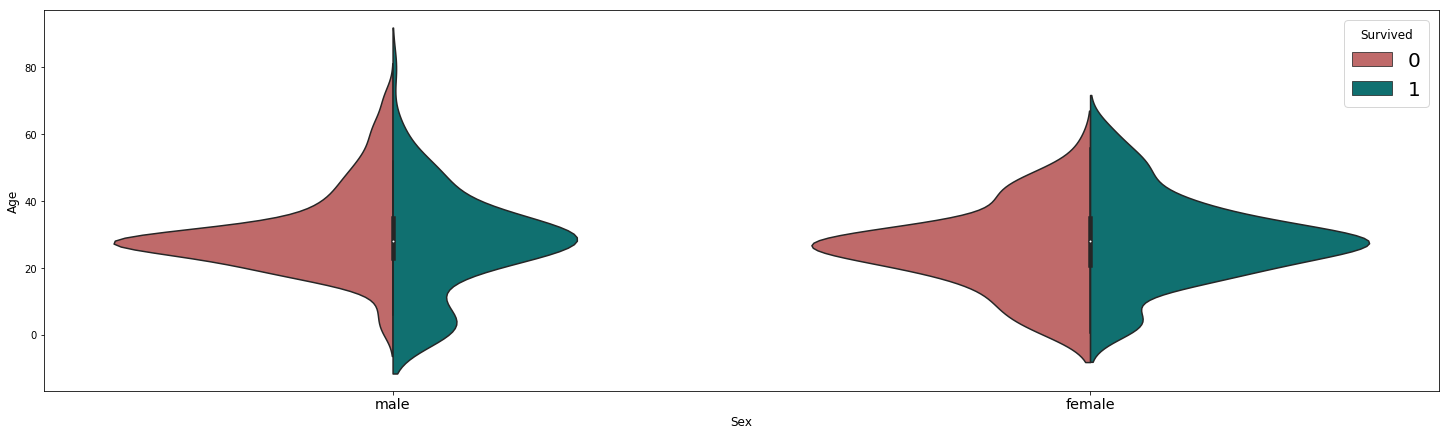

In [48]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=data,
              split=True,
              palette = {0 : "IndianRed", 1 : "teal"}
              );